In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
company = pd.read_csv("/kaggle/input/electoral-bond-data-state-bank-of-india/PurchaseData.csv")
party = pd.read_csv("/kaggle/input/electoral-bond-data-state-bank-of-india/EncashmentData.csv")

In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19207 entries, 0 to 19206
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date of Purchase  18871 non-null  object 
 1   Purchaser Name    18871 non-null  object 
 2   Denomination      18871 non-null  float64
dtypes: float64(1), object(2)
memory usage: 450.3+ KB


In [4]:
party.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20846 entries, 0 to 20845
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date of
Encashment           20421 non-null  object 
 1   Name of the Political Party  20421 non-null  object 
 2   Denomination                 20421 non-null  float64
dtypes: float64(1), object(2)
memory usage: 488.7+ KB


In [5]:
company.columns

Index(['Date of Purchase', 'Purchaser Name', 'Denomination'], dtype='object')

In [6]:
party.columns

Index(['Date of\nEncashment', 'Name of the Political Party', 'Denomination'], dtype='object')

In [7]:
company.shape

(19207, 3)

In [8]:
party.shape

(20846, 3)

In [9]:
company['Purchaser Name'].value_counts()

Purchaser Name
FUTURE GAMING AND HOTEL SERVICES PR               1208
MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED     821
QWIKSUPPLYCHAINPRIVATELIMITED                      410
HALDIA ENERGY LIMITED                              395
VEDANTA LIMITED                                    386
                                                  ... 
MR. SAMEER BHATIA                                    1
B.DAS AND ASSOCIATES PVT. LTD.                       1
J B ENTERPRISE                                       1
RAYALA SEEMA WIND ENERGY PVT LTD                     1
GORUKANTI SURENDER RAO                               1
Name: count, Length: 1316, dtype: int64

In [10]:
company.head(5)

,Date of Purchase,Purchaser Name,Denomination
0,12-Apr-19,A B C INDIA LIMITED,100000.0
1,12-Apr-19,A B C INDIA LIMITED,100000.0
2,12-Apr-19,A B C INDIA LIMITED,1000000.0
3,12-Apr-19,A B C INDIA LIMITED,1000000.0
4,12-Apr-19,A B C INDIA LIMITED,100000.0


In [11]:
party.head(5)

,Date of\nEncashment,Name of the Political Party,Denomination
0,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
1,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
2,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000.0
3,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
4,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0


In [12]:
# Convert the 'Denomination' column to numeric type
company['Denomination']= pd.to_numeric(company['Denomination'])

In [13]:
company.head(5)

,Date of Purchase,Purchaser Name,Denomination
0,12-Apr-19,A B C INDIA LIMITED,100000.0
1,12-Apr-19,A B C INDIA LIMITED,100000.0
2,12-Apr-19,A B C INDIA LIMITED,1000000.0
3,12-Apr-19,A B C INDIA LIMITED,1000000.0
4,12-Apr-19,A B C INDIA LIMITED,100000.0


In [14]:
# Convert the 'Denomination' column to numeric type
party['Denomination']= pd.to_numeric(party['Denomination'])

In [15]:
party.head(5)

,Date of\nEncashment,Name of the Political Party,Denomination
0,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
1,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
2,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000.0
3,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
4,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0


In [16]:
# rename colume name
party.rename(columns={'Name of the Political Party': 'Political Party'}, inplace=True)

In [17]:
party['Political Party'].value_counts()

Political Party
BHARTIYA JANTA PARTY                              8633
ALL INDIA TRINAMOOL CONGRESS                      3305
PRESIDENT, ALL INDIA CONGRESS COMMITTEE           3146
BHARAT RASHTRA SAMITHI                            1806
BIJU JANATA DAL                                    861
DMK PARTY IN PARLIAMENT                            648
YSR CONGRESS PARTY (YUVAJANA SRAMIKA R             472
SHIVSENA (POLITICAL PARTY)                         354
TELUGU DESAM PARTY                                 279
AAM AADMI PARTY                                    245
RASTRIYA JANTA DAL                                 149
NATIONALIST CONGRESS PARTY PARLIAMENT OF           116
JANATA DAL ( SECULAR )                              75
SIKKIM KRANTIKARI MORCHA                            50
ADYAKSHA SAMAJVADI PARTY                            46
JHARKHAND MUKTI MORCHA                              45
JANASENA PARTY                                      39
ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM         

In [18]:
# Convert denomination to crore
party['Denomination'] = party['Denomination'] / 1e7

# Rename the column to indicate values are in crore
party.rename(columns={'Denomination': 'Denomination (Crore)'}, inplace=True)

party

,Date of\nEncashment,Political Party,Denomination (Crore)
0,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,0.1
1,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,0.1
2,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1.0
3,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,0.1
4,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,0.1
...,...,...,...
20841,24-Jan-24,JANASENA PARTY,0.1
20842,24-Jan-24,JANASENA PARTY,0.1
20843,24-Jan-24,JANASENA PARTY,0.1
20844,24-Jan-24,JANASENA PARTY,0.1


In [19]:
# Convert denomination to crore
company['Denomination'] = company['Denomination'] / 1e7

# Rename the column 
company.rename(columns={'Denomination': 'Denomination (Crore)'}, inplace=True)

company

,Date of Purchase,Purchaser Name,Denomination (Crore)
0,12-Apr-19,A B C INDIA LIMITED,0.01
1,12-Apr-19,A B C INDIA LIMITED,0.01
2,12-Apr-19,A B C INDIA LIMITED,0.10
3,12-Apr-19,A B C INDIA LIMITED,0.10
4,12-Apr-19,A B C INDIA LIMITED,0.01
...,...,...,...
19202,11-Jan-24,WESTWELL GASES PRIVATE LIMITED,1.00
19203,11-Jan-24,WESTWELL GASES PRIVATE LIMITED,1.00
19204,11-Jan-24,WESTWELL GASES PRIVATE LIMITED,1.00
19205,11-Jan-24,WESTWELL GASES PRIVATE LIMITED,1.00


In [20]:
unique_companies = company['Purchaser Name'].unique().tolist()
num_unique_companies = len(unique_companies)
print("Total companies who purchased electoral bonds :",num_unique_companies)

Total companies who purchased electoral bonds : 1317


In [21]:
unique_companies

['A B C INDIA LIMITED',
 'ACROPOLIS MAINTENANCE SERVICES PRIVATE LIMITED',
 'ARIHANT ENTERPRISES',
 'CHOUDHARY GARMENTS',
 'ESSEL MINING AND INDS LTD',
 nan,
 'GRASIM INDUSTRIES LTD',
 'HIGHSTREET CRUISES AND ENTERTAINMENT PVT LTD',
 'INNOCENT MERCHANDISE PVT LTD',
 'KAMLANG SAW & VENEER MILLS PVT LTD',
 'MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED',
 'MERLIN RECREATION PVT LTD',
 'MSPL LTD',
 'MYRIAD DEVELOPERS',
 'OMKAR VENTURES PVT LTD',
 'PATEL HIGHWAY MANAGEMENT PVT LTD',
 'PHL FINIVEST PVT LTD',
 'PIRAMAL CAPITAL AND HOUSING FINANCE LTD',
 'PIRAMAL ENTERPRISES LTD',
 'PONUGOTI HEMENDAR RAO',
 'RENUKA INVESTMENTS AND FINANCE LTD',
 'RENUKESHWAR INVESTMENTS PVT LTD',
 'SHIVAM TRANSCON PRIVATE LIMITED',
 'SKYWORLD DEVELOPERS LLP',
 'TEXPORT CREATION',
 'ALOK NARAYAN PANDEY',
 'BELLWEY INTERNATIONAL CO',
 'CHHATTISGARH DISTILLERIES LIMITED',
 'DEMPO INDUSTRIES PVT LTD',
 'GUJARAT FLUORO CHEMICALS LIMITED',
 'KOTESWAR RAO GULLAPALLY',
 'MANDADI RAMULU',
 'MOHINDER KUMAR JAIN',
 'MR

In [22]:
company_totals = company.groupby('Purchaser Name')['Denomination (Crore)'].sum().reset_index().sort_values(by='Denomination (Crore)', ascending = False)

# Display the total amount for each company
top_50 = company_totals.head(50)

In [23]:
# Create a dynamic Pie chart
fig = px.pie(top_50, values='Denomination (Crore)', names='Purchaser Name', 
             title='Denomination Distribution by Political Party',
             hover_data=['Denomination (Crore)'], 
             labels={'Denomination (Crore)': 'Denomination (Crore)'}, 
             hole=0.6,
             width=800, 
             height=600)

# Show the plot
fig.show()

In [24]:
fig = px.bar(top_50, x='Purchaser Name', y='Denomination (Crore)', 
             title='Denomination Distribution by Political Party',
             color='Purchaser Name',
             hover_data=['Denomination (Crore)'], 
             labels={'Denomination (Crore)': 'Denomination (Crore)'}, 
             width=1100,  
             height=700)  

# Show the plot
fig.show()

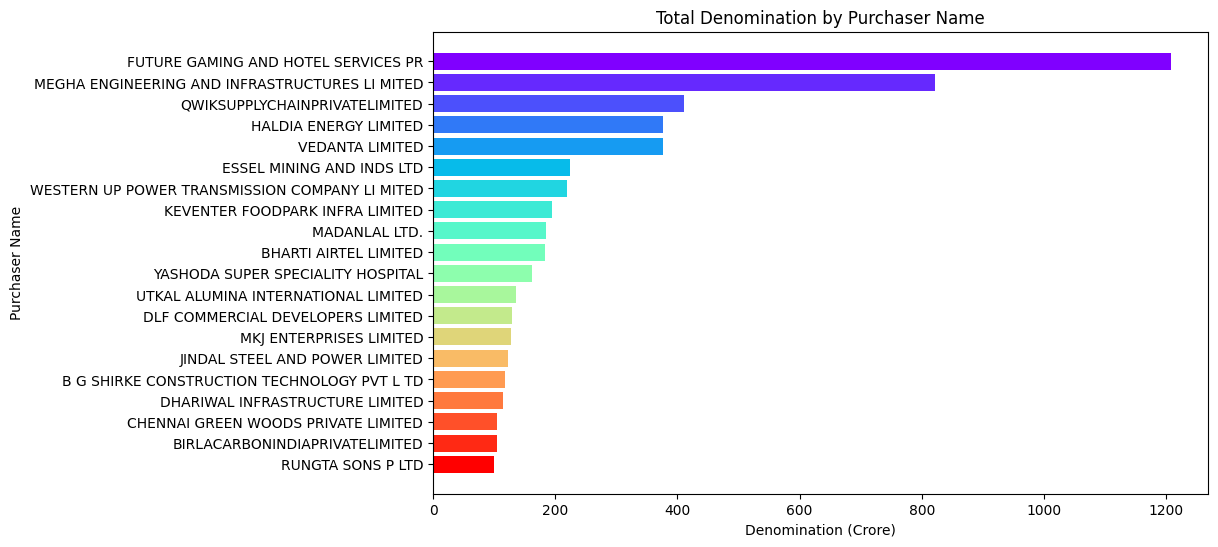

In [25]:
# take top 20 companies by electoral bond purchase
top_20 = top_50.head(20)

colors = plt.cm.rainbow(np.linspace(0, 1, len(top_20)))
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_20['Purchaser Name'], top_20['Denomination (Crore)'], color=colors)
plt.xlabel('Denomination (Crore)')
plt.ylabel('Purchaser Name')
plt.title('Total Denomination by Purchaser Name')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest denomination on top
plt.show()

In [26]:
unique_parties = party['Political Party'].unique().tolist()
num_unique_parties = len(unique_parties)
print("Total Parties :",num_unique_parties)

Total Parties : 28


In [27]:
unique_parties

['ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM',
 'BHARAT RASHTRA SAMITHI',
 nan,
 'BHARTIYA JANTA PARTY',
 'PRESIDENT, ALL INDIA CONGRESS COMMITTEE',
 'SHIVSENA (POLITICAL PARTY)',
 'TELUGU DESAM PARTY',
 'YSR CONGRESS PARTY (YUVAJANA SRAMIKA R',
 'DMK PARTY IN PARLIAMENT',
 'JANATA DAL ( SECULAR )',
 'NATIONALIST CONGRESS PARTY PARLIAMENT OF',
 'ALL INDIA TRINAMOOL CONGRESS',
 'BIHAR PRADESH JANTA DAL(UNITED)',
 'RASTRIYA JANTA DAL',
 'AAM AADMI PARTY',
 'ADYAKSHA SAMAJVADI PARTY',
 'SHIROMANI AKALI DAL',
 'JHARKHAND MUKTI MORCHA',
 'JAMMU AND KASHMIR NATIONAL CONFERENCE',
 'BIJU JANATA DAL',
 'SHIVSENA',
 'NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH',
 'GOA FORWARD PARTY',
 'MAHARASHTRAWADI GOMNTAK PARTY',
 'SIKKIM KRANTIKARI MORCHA',
 'JANASENA PARTY',
 'RASHTRIYA JANTA DAL',
 'SIKKIM DEMOCRATIC FRONT']

In [28]:
party_totals = party.groupby('Political Party')['Denomination (Crore)'].sum().reset_index().sort_values(by='Denomination (Crore)', ascending = False)

# Display the total amount for each party
party_totals

,Political Party,Denomination (Crore)
5,BHARTIYA JANTA PARTY,6060.5111
3,ALL INDIA TRINAMOOL CONGRESS,1609.5314
17,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",1421.8655
4,BHARAT RASHTRA SAMITHI,1214.7099
7,BIJU JANATA DAL,775.5000
8,DMK PARTY IN PARLIAMENT,639.0000
26,YSR CONGRESS PARTY (YUVAJANA SRAMIKA R,337.0000
25,TELUGU DESAM PARTY,218.8800
22,SHIVSENA (POLITICAL PARTY),158.3814
19,RASTRIYA JANTA DAL,72.5000


In [29]:
# Create a dynamic Pie chart
fig = px.pie(party_totals, values='Denomination (Crore)', names='Political Party', 
             title='Denomination Distribution by Political Party',
             hover_data=['Denomination (Crore)'], 
             labels={'Denomination (Crore)': 'Denomination (Crore)'}, 
             hole=0.5,
             width=800, 
             height=600)

# Show the plot
fig.show()

In [30]:
fig = px.bar(party_totals, x='Political Party', y='Denomination (Crore)', 
             title='Denomination Distribution by Political Party',
             color='Political Party',
             hover_data=['Denomination (Crore)'], 
             labels={'Denomination (Crore)': 'Denomination (Crore)'}, 
             width=1100,  
             height=700)  

# Show the plot
fig.show()

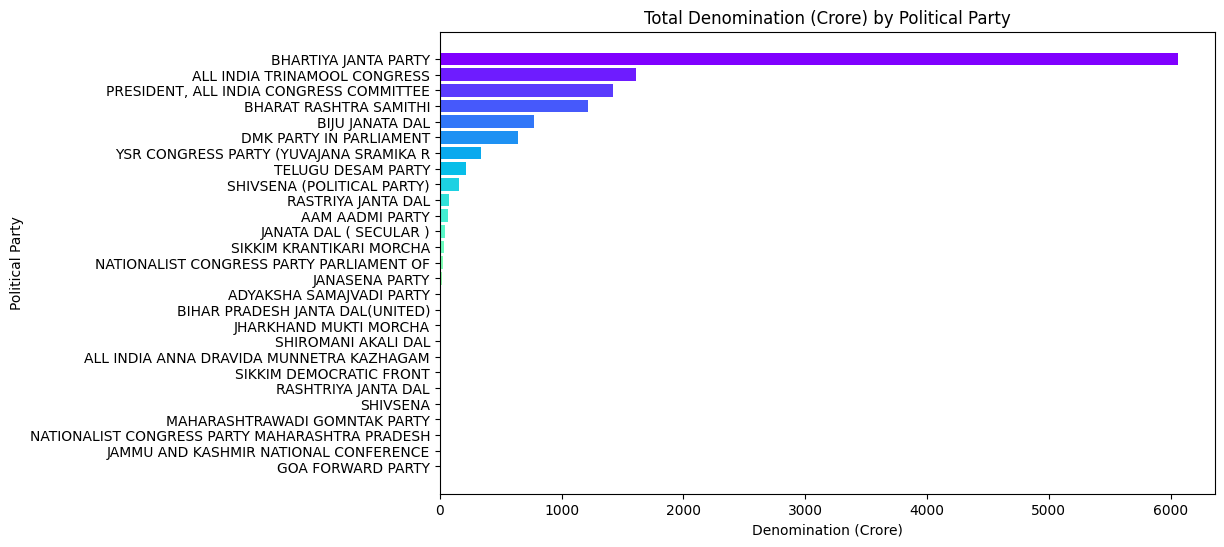

In [31]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(party_totals)))

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(party_totals['Political Party'], party_totals['Denomination (Crore)'], color=colors)
plt.xlabel('Denomination (Crore)')
plt.ylabel('Political Party')
plt.title('Total Denomination (Crore) by Political Party')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest denomination on top
plt.show()

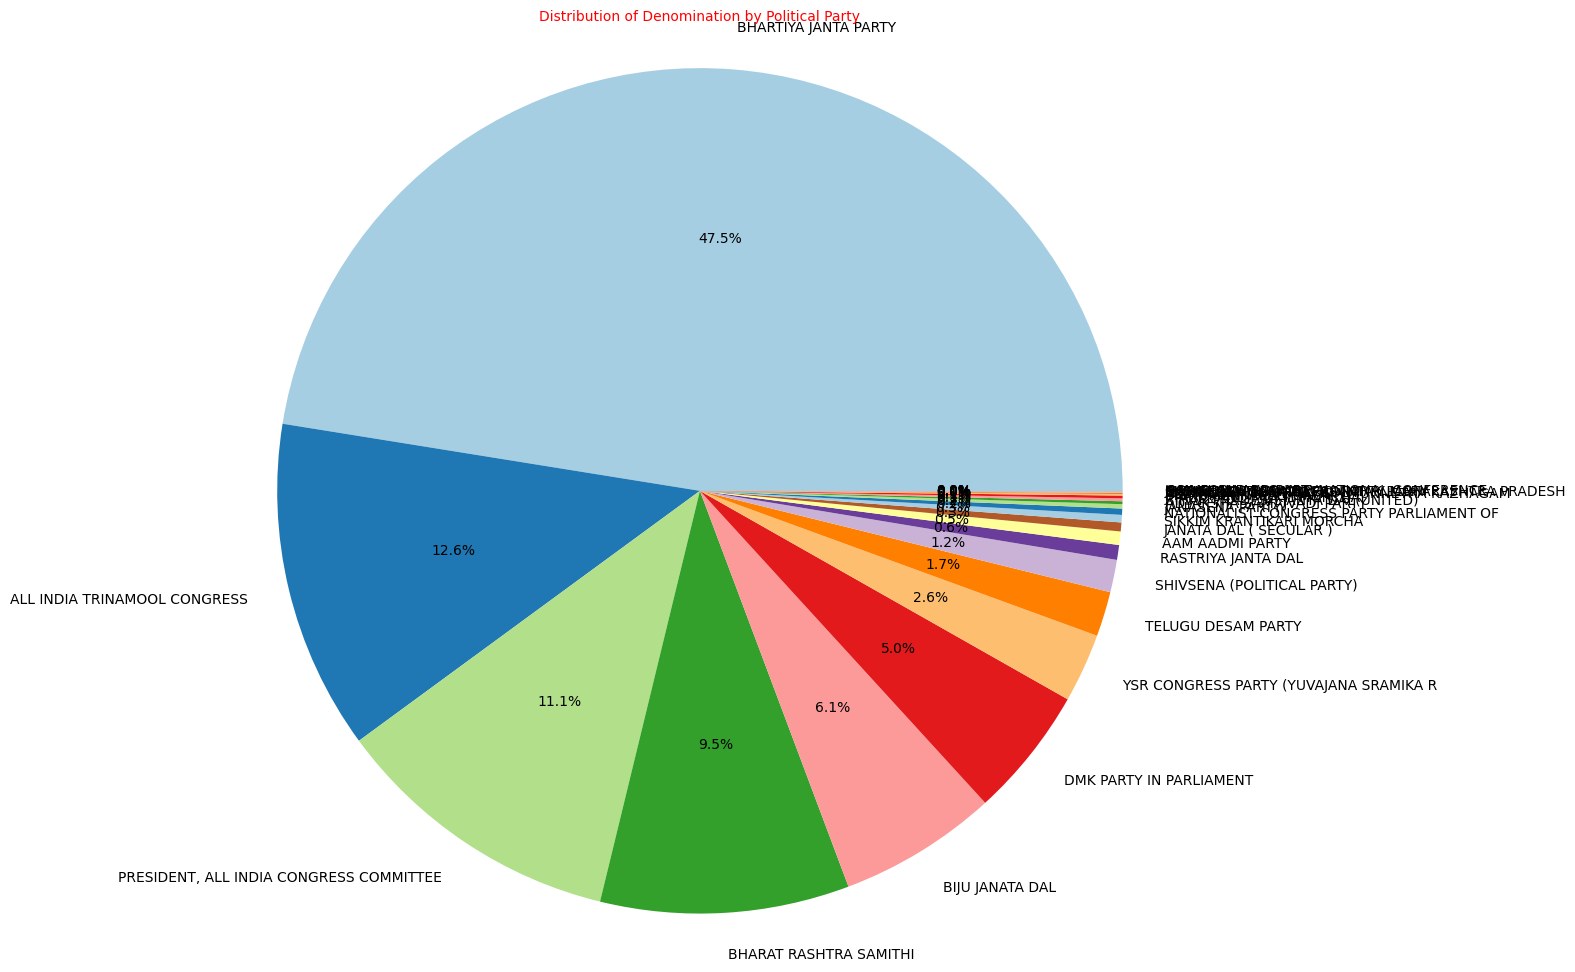

In [32]:
# Plotting a pie chart
plt.figure(figsize=(12, 12))
plt.pie(party_totals['Denomination (Crore)'], labels=party_totals['Political Party'], autopct='%1.1f%%', startangle=360, colors=plt.cm.Paired.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Denomination by Political Party', color='red',size=10)
plt.show()

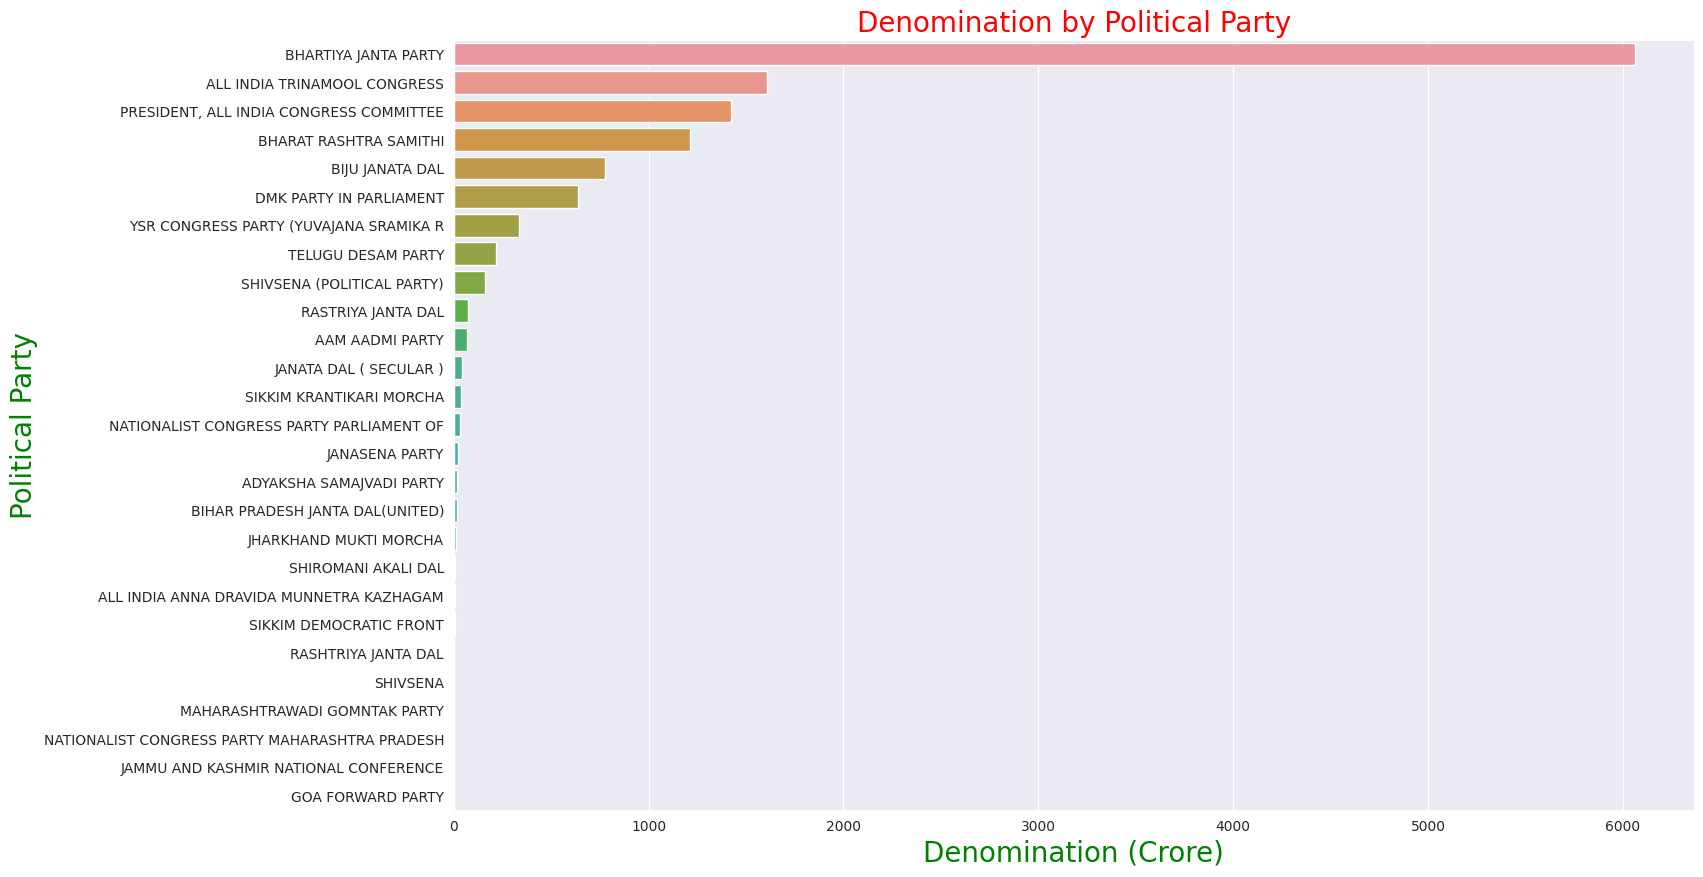

In [33]:
# Create a bar graph
sns.set_style('darkgrid')
plt.figure(figsize=(16,10))
# Assuming 'Political Party' and 'Denomination (Crore)' are the correct column names
sns.barplot(y='Political Party', x='Denomination (Crore)', data=party_totals)
plt.xlabel('Denomination (Crore)', color='green', size=20)
plt.ylabel('Political Party', color='green', size=20)
plt.title('Denomination by Political Party', color='red', size=20)
plt.show()